# Leading Score Case Study

Goals of the Case Study:
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#Importing Libraries
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

In [4]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Datatypes looks correct

In [5]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [6]:
# Columns such as Specialization, Lead Profile, City has "select" has value. So Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [7]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [9]:
# dropping the columns with missing values greater than 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [10]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [11]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

In [12]:
lead_data['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
lead_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [14]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [15]:
lead_data['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [16]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
#Dropping this column as it does not look useful
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

In [18]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Mostly unemployed so we can impute missing values to unemployed

In [19]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [20]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Mostly India so we can impute missing values to India

In [21]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

In [22]:
lead_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Mostly Mumbai so missing values can be Mumbai

In [23]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [24]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [25]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [26]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# checking the shape of the data 
lead_data.shape

(9074, 29)

### Exploratory Data Anaysis

In [28]:
lead_data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [29]:
Convertedpercent = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Convertedpercent

37.85541106458012

#### Conversion rate is approx 38%

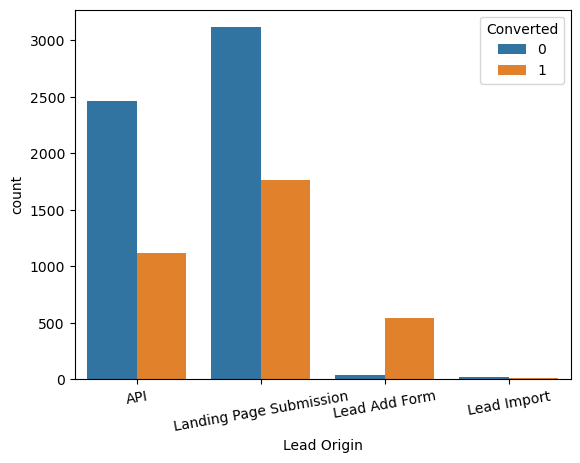

In [30]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 10)
plt.show()

#### API and Landing Page Submission have conversion rate but count lead 'not converted' is high.
#### Lead Add Form has less count but more conversion rate as compared to the count 'not converted'.
#### Lead Import are very less in count.

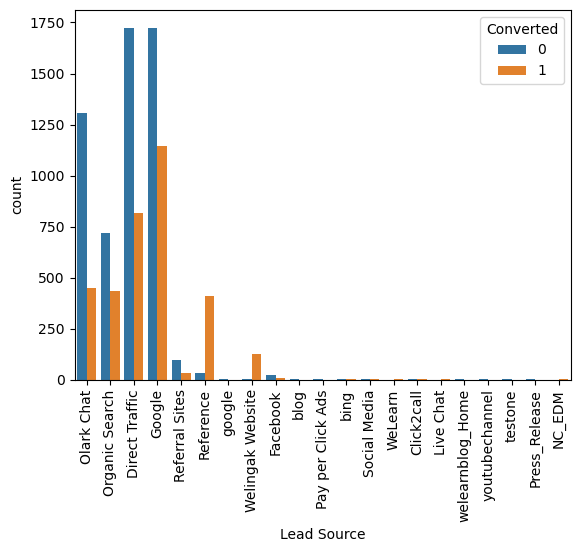

In [31]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [32]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [33]:
# Creating a new category 'Others' for some of the Lead Sources that have extremely less values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media','WeLearn','Click2call', 'Live Chat', 
     'welearnblog_Home', 'youtubechannel', 'testone','Press_Release', 'NC_EDM'], 'Others')

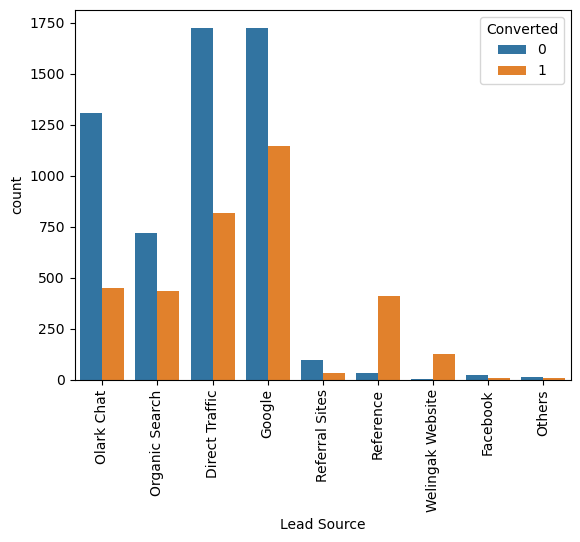

In [34]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

#### Google and Direct traffic generates maximum number of leads.
#### Conversion Rate of reference leads and leads through welingak website is high even though the overall count is less.

In [35]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

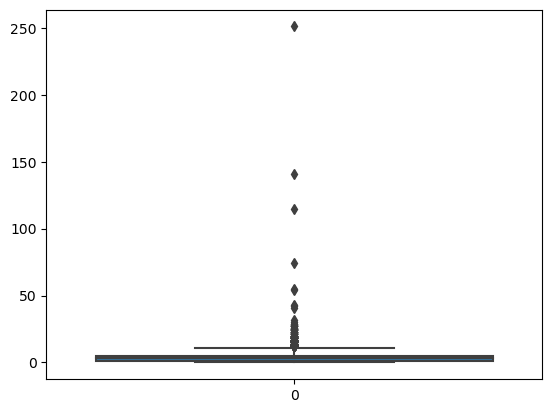

In [36]:
#Boxplot to check outliers
sns.boxplot(lead_data['TotalVisits'])
plt.show()

In [37]:
#Outliers are present, so we can cap it
threshold1 = lead_data['TotalVisits'].quantile(0.95)
lead_data['TotalVisits'][lead_data['TotalVisits'] >= threshold1] = threshold1

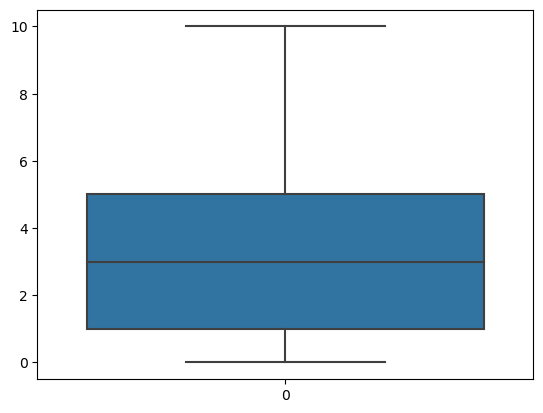

In [38]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

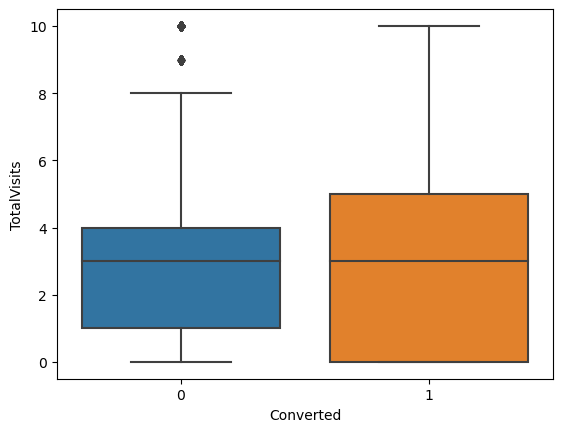

In [39]:
#Analyzing who converted based on total visits 
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)

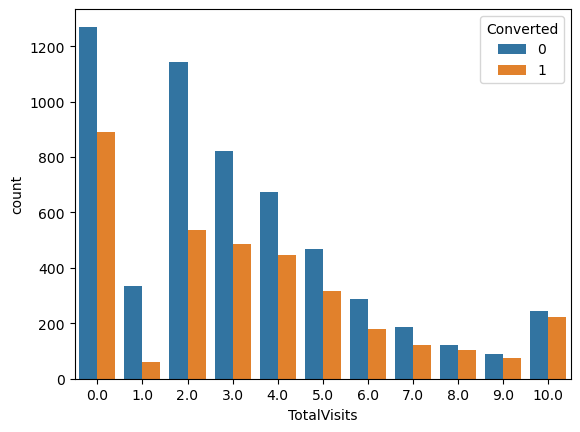

In [40]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = lead_data)
plt.show()

#### People who have visited the website more is more likely to get converted.
#### however, the total counts of customers visiting the site more often is less

In [41]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

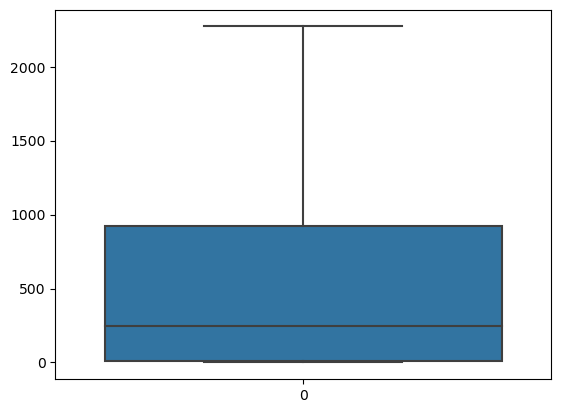

In [42]:
#Boxplot to check outliers
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

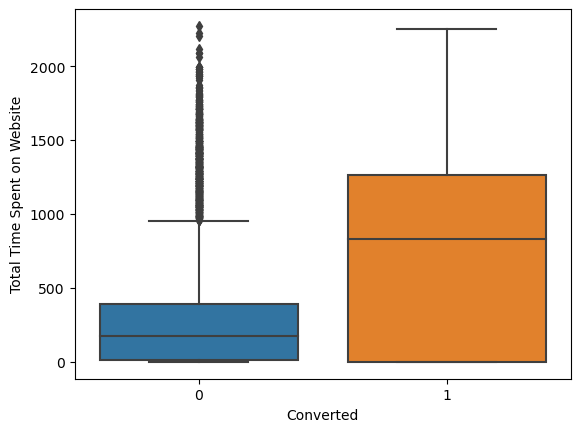

In [43]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)

#### Leads spending more time on the weblise are more likely to be converted.

In [44]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

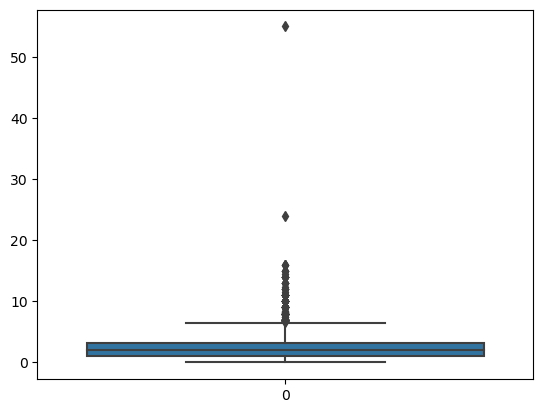

In [45]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [46]:
#Outliers are present, so we can cap it
threshold2 = lead_data['Page Views Per Visit'].quantile(0.95)
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= threshold2] = threshold2

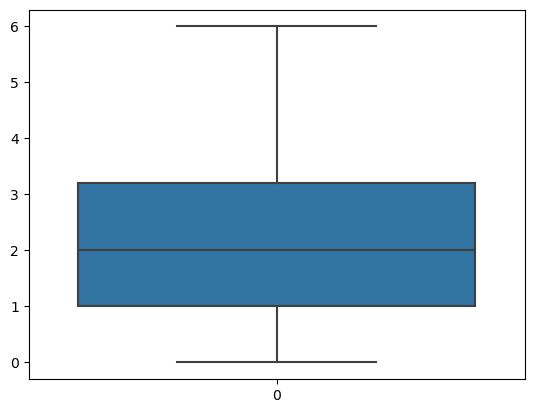

In [47]:
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

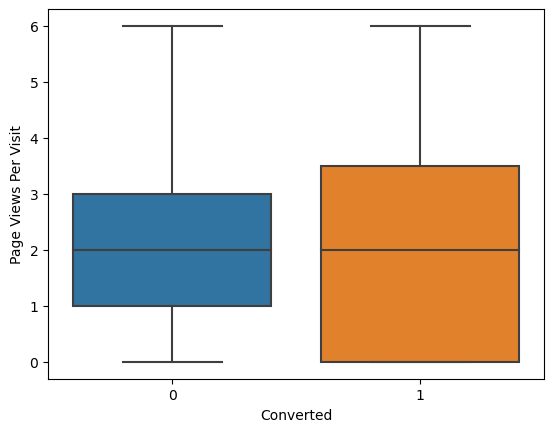

In [48]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)

In [49]:
lead_data['Last Activity'].describe() 

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [50]:
lead_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

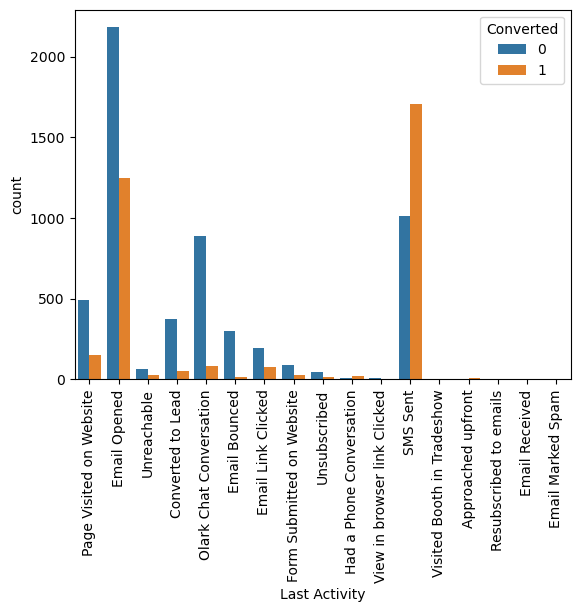

In [51]:
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [52]:
# We can club the last activities to "Others" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Email Bounced','Form Submitted on Website','Unreachable', 'Unsubscribed' ,'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

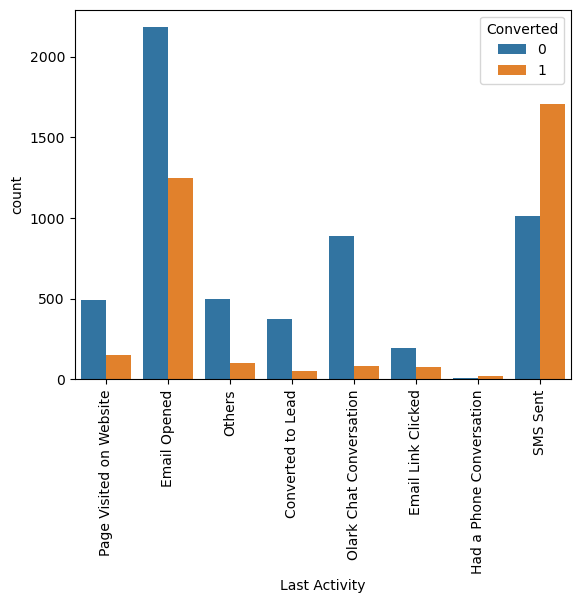

In [53]:
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

#### Most of the lead have their Email opened as their last activity.
#### Conversion rate for leads with last activity as SMS Sent the highest.
#### Leads to whom SMSes are sent are most likely to get converted

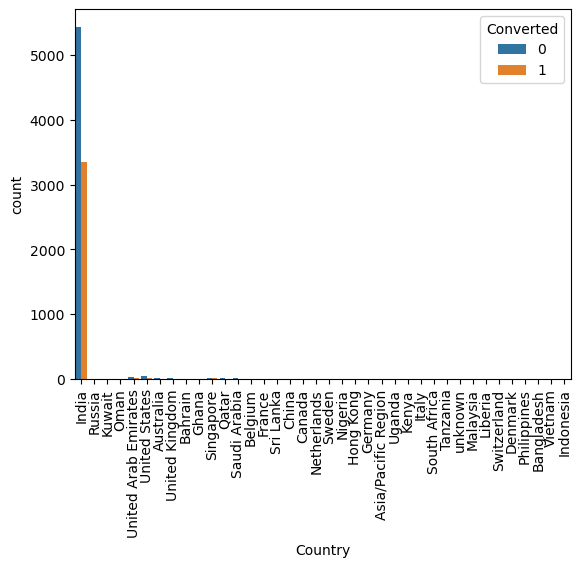

In [54]:
sns.countplot(x = "Country", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

#### Maximum leads are from India

In [55]:
# Replace all countries except 'India' with 'Others'
lead_data['Country'] = lead_data['Country'].apply(lambda x: 'Others' if x != 'India' else x)

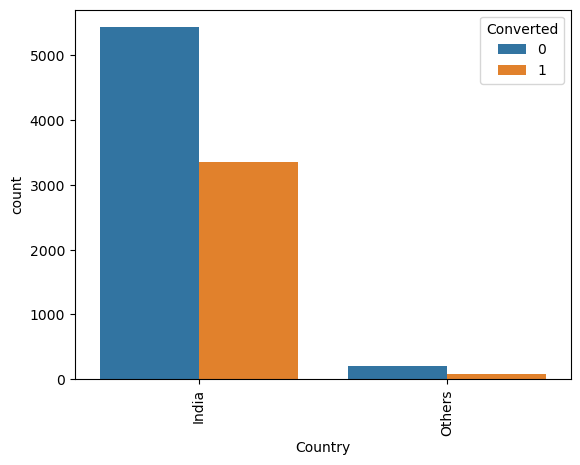

In [56]:
sns.countplot(x = "Country", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

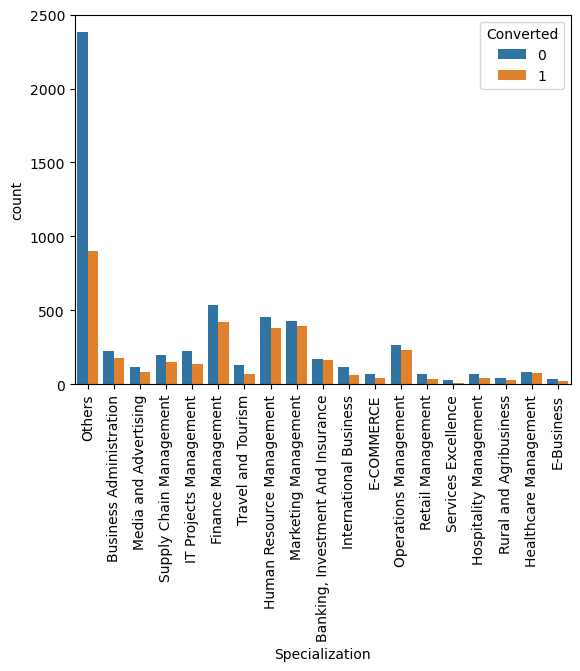

In [57]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

#### Leads with Specialization : Financial Management, Operations mgmt, Human resource mgmt, banking and insurance, Marketing mgmt, healthcare magmt are most likely to get converted.
#### Almost all the leads that have mentioned their specialization are likely to get converted since they have conversion rate close to non conversion
#### There are others with conversion as well, so we need to focus on getting their specializations to make more inferences.

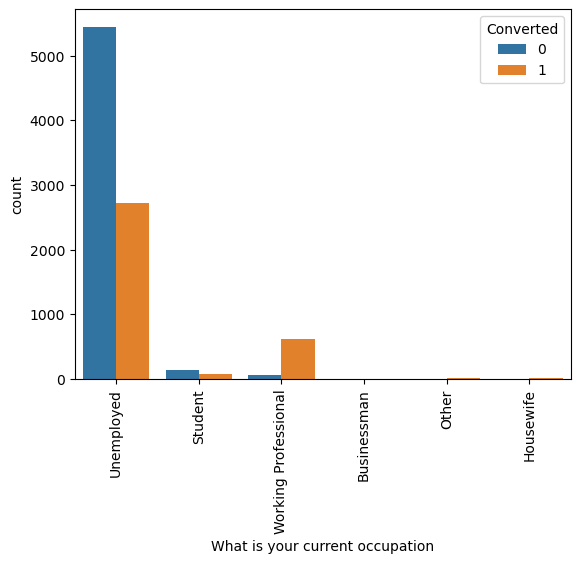

In [58]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

#### Working professionals are more like to get converted.
#### Secondly the unemployed leads are also likely to get converted

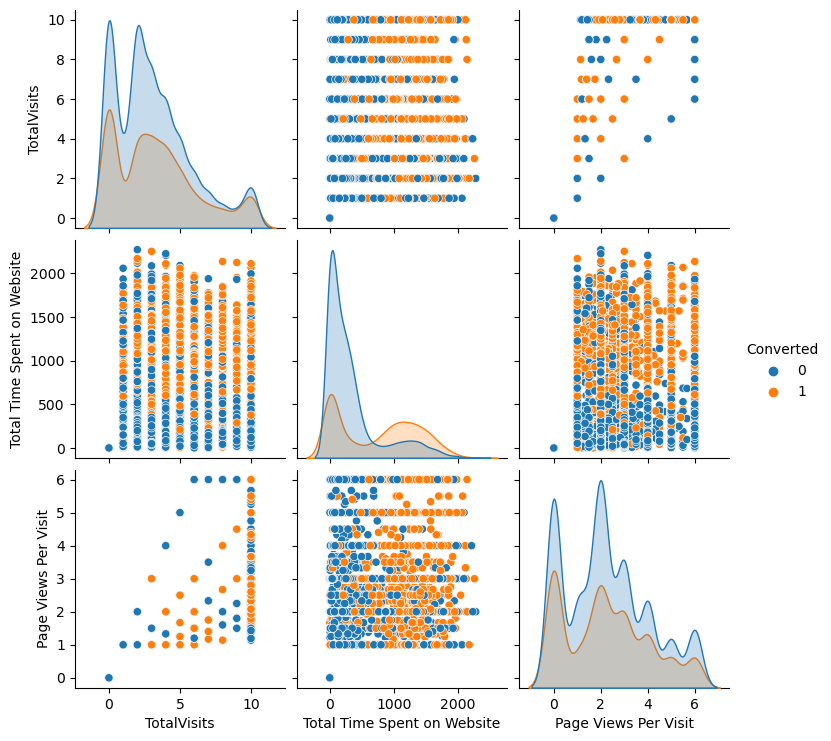

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

x_edu = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

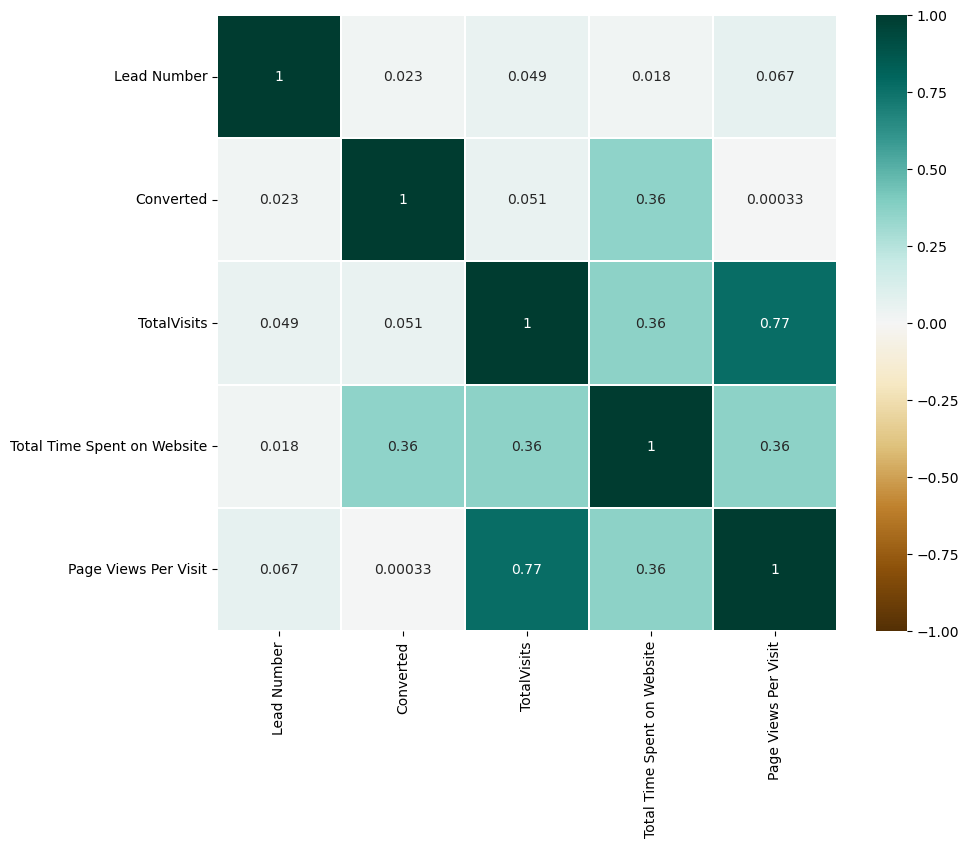

In [60]:
# Filter numeric columns

numeric_leads = lead_data.select_dtypes(include=["number"])
# Observing Correlation

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(numeric_leads.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

In [61]:
#dropping the columns that do no seem to be useful
lead_data = lead_data.drop(['Prospect ID', 'City', 'Country','Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'],1)

In [62]:
lead_data.shape

(9074, 12)

In [63]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64

In [64]:
lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.050742,0.359261,0.000329
TotalVisits,0.050742,1.000000,0.361207,0.766567
Total Time Spent on Website,0.359261,0.361207,1.000000,0.364735
Page Views Per Visit,0.000329,0.766567,0.364735,1.000000


### Data Preparation

In [65]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


In [66]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Do Not Call','Lead Origin','Do Not Email','Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [68]:
lead_data = lead_data.drop(['Do Not Call','Lead Origin','Do Not Email','Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity'], axis = 1)

In [69]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train Test Split

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scale the 3 numeric columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.2,0.178347,0.333333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.2,0.085355,0.333333,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.2,0.619946,0.333333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.5,0.711590,0.416667,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

### Model Building
### Feature Selection Using RFE

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


logreg = LogisticRegression()
logreg.fit(X_train,y_train)

rfe = RFE(estimator=logreg,  n_features_to_select=15)             # running RFE with variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Do Not Call_Yes', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Do Not Email_Yes', True, 1),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', False, 14),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 20),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', F

In [78]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Do Not Call_Yes',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Speci

In [80]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,3.41
12,Last Notable Activity_Had a Phone Conversation,3.40
9,Specialization_Others,2.16
0,Total Time Spent on Website,2.00
1,Lead Origin_Landing Page Submission,1.98
4,Lead Source_Olark Chat,1.94
8,Last Activity_SMS Sent,1.57
2,Lead Origin_Lead Add Form,1.53
7,Last Activity_Olark Chat Conversation,1.45
5,Lead Source_Welingak Website,1.36


#### Model 1

In [82]:
import statsmodels.api as sm

In [83]:
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [84]:
#check parameters obtained
lr1.params

const                                                   0.221334
Total Time Spent on Website                             0.785592
Lead Origin_Landing Page Submission                    -0.157264
Lead Origin_Lead Add Form                               0.480070
Do Not Email_Yes                                       -0.190547
Lead Source_Olark Chat                                  0.177370
Lead Source_Welingak Website                            0.281267
Last Activity_Had a Phone Conversation                  0.295403
Last Activity_Olark Chat Conversation                  -0.165714
Last Activity_SMS Sent                                  0.227863
Specialization_Others                                  -0.161308
What is your current occupation_Housewife               0.442486
What is your current occupation_Working Professional    0.312618
Last Notable Activity_Had a Phone Conversation          0.159892
Last Notable Activity_Unreachable                       0.318752
Last Notable Activity_Uns

In [85]:
#summary 
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     294.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:02:18   Log-Likelihood:                -2756.6
No. Observations:                6351   AIC:                             5545.
Df Residuals:                    6335   BIC:                             5653.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model2
#### Dropping Last Notable Activity_Had a Phone Conversation - High p value

In [86]:
X_train_new = X_train_rfe.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)

In [87]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
0,Total Time Spent on Website,2.00
1,Lead Origin_Landing Page Submission,1.98
4,Lead Source_Olark Chat,1.94
8,Last Activity_SMS Sent,1.57
2,Lead Origin_Lead Add Form,1.53
7,Last Activity_Olark Chat Conversation,1.45
5,Lead Source_Welingak Website,1.36
11,What is your current occupation_Working Profes...,1.20
3,Do Not Email_Yes,1.17


#### Build Second fitted model

In [88]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [89]:
lr2.params

const                                                   0.221541
Total Time Spent on Website                             0.785510
Lead Origin_Landing Page Submission                    -0.157389
Lead Origin_Lead Add Form                               0.479937
Do Not Email_Yes                                       -0.190803
Lead Source_Olark Chat                                  0.177542
Lead Source_Welingak Website                            0.281573
Last Activity_Had a Phone Conversation                  0.408238
Last Activity_Olark Chat Conversation                  -0.165678
Last Activity_SMS Sent                                  0.227855
Specialization_Others                                  -0.161699
What is your current occupation_Housewife               0.442410
What is your current occupation_Working Professional    0.312747
Last Notable Activity_Unreachable                       0.318705
Last Notable Activity_Unsubscribed                      0.183509
dtype: float64

In [90]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     315.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:02:18   Log-Likelihood:                -2757.0
No. Observations:                6351   AIC:                             5544.
Df Residuals:                    6336   BIC:                             5645.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 3
#### Removing What is your current occupation_Housewife


In [91]:
X_train_new = X_train_new.drop(['What is your current occupation_Housewife'],axis=1)

In [92]:
#VIF Check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
0,Total Time Spent on Website,1.99
1,Lead Origin_Landing Page Submission,1.98
4,Lead Source_Olark Chat,1.94
8,Last Activity_SMS Sent,1.57
2,Lead Origin_Lead Add Form,1.52
7,Last Activity_Olark Chat Conversation,1.45
5,Lead Source_Welingak Website,1.36
10,What is your current occupation_Working Profes...,1.20
3,Do Not Email_Yes,1.17


#### Create a 3rd fitted model

In [93]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [94]:
lr3.params

const                                                   0.223290
Total Time Spent on Website                             0.786432
Lead Origin_Landing Page Submission                    -0.158436
Lead Origin_Lead Add Form                               0.483716
Do Not Email_Yes                                       -0.191240
Lead Source_Olark Chat                                  0.177553
Lead Source_Welingak Website                            0.278090
Last Activity_Had a Phone Conversation                  0.407320
Last Activity_Olark Chat Conversation                  -0.166062
Last Activity_SMS Sent                                  0.226826
Specialization_Others                                  -0.163278
What is your current occupation_Working Professional    0.310982
Last Notable Activity_Unreachable                       0.317795
Last Notable Activity_Unsubscribed                      0.183214
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     338.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:02:18   Log-Likelihood:                -2761.8
No. Observations:                6351   AIC:                             5552.
Df Residuals:                    6337   BIC:                             5646.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 4
#### Removing Last Notable Activity_Unsubscribed based on high p value

In [96]:
X_train_new = X_train_new.drop(['Last Notable Activity_Unsubscribed'],axis=1)

In [97]:
#VIF Check
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
0,Total Time Spent on Website,1.99
1,Lead Origin_Landing Page Submission,1.98
4,Lead Source_Olark Chat,1.93
8,Last Activity_SMS Sent,1.57
2,Lead Origin_Lead Add Form,1.52
7,Last Activity_Olark Chat Conversation,1.45
5,Lead Source_Welingak Website,1.36
10,What is your current occupation_Working Profes...,1.20
3,Do Not Email_Yes,1.11


#### Create a 4th fitted model

In [98]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a 4th fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [99]:
lr4.params

const                                                   0.223876
Total Time Spent on Website                             0.788301
Lead Origin_Landing Page Submission                    -0.159315
Lead Origin_Lead Add Form                               0.483202
Do Not Email_Yes                                       -0.180839
Lead Source_Olark Chat                                  0.178131
Lead Source_Welingak Website                            0.278319
Last Activity_Had a Phone Conversation                  0.405886
Last Activity_Olark Chat Conversation                  -0.167068
Last Activity_SMS Sent                                  0.225500
Specialization_Others                                  -0.163705
What is your current occupation_Working Professional    0.311867
Last Notable Activity_Unreachable                       0.316851
dtype: float64

In [100]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     366.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:02:18   Log-Likelihood:                -2765.0
No. Observations:                6351   AIC:                             5556.
Df Residuals:                    6338   BIC:                             5644.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model Evaluation

#### Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [101]:
X_train_const = sm.add_constant(X_train_lm4)

In [102]:
# Use 'predict' to predict the probabilities on the train set
X_train_pred_const = sm.add_constant(X_train_lm4)
y_train_pred = lr4.predict(X_train_pred_const)
y_train_pred[:10]

3009    0.205152
1012    0.099169
9226    0.463802
4750    0.778765
7987    0.851008
1281    0.638528
2880    0.065977
4971    0.988366
7536    0.765036
1248    0.820198
dtype: float64

In [103]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20515169, 0.09916867, 0.46380171, 0.77876474, 0.85100792,
       0.63852799, 0.06597734, 0.98836647, 0.7650363 , 0.82019833])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [104]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.205152
1,0,0.099169
2,0,0.463802
3,1,0.778765
4,1,0.851008


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [105]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.205152,0
1,0,0.099169,0
2,0,0.463802,0
3,1,0.778765,1
4,1,0.851008,1


#### Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [106]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [107]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3502  403]
 [ 852 1594]]


In [108]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8023933238860022


In [109]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Calculate the sensitivity

TP/(TP+FN)

0.651676206050695

In [111]:
# Calculate the specificity

TN/(TN+FP)

0.8967989756722151

### Finding the Optimal Cutoff
#### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [112]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [114]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

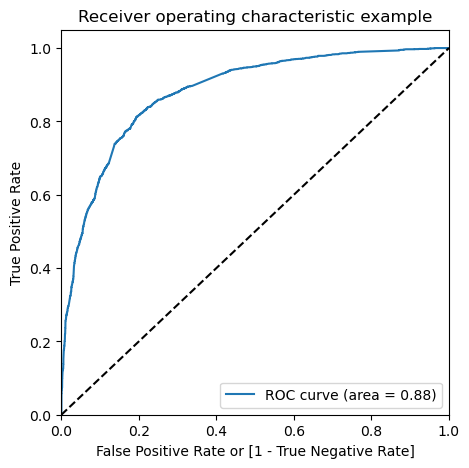

In [115]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [116]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.205152,0,1,1,1,0,0,0,0,0,0,0
1,0,0.099169,0,1,0,0,0,0,0,0,0,0,0
2,0,0.463802,0,1,1,1,1,1,0,0,0,0,0
3,1,0.778765,1,1,1,1,1,1,1,1,1,0,0
4,1,0.851008,1,1,1,1,1,1,1,1,1,1,0


In [117]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.430956  0.997547  0.076056
0.1   0.1  0.571564  0.979967  0.315749
0.2   0.2  0.692647  0.944808  0.534699
0.3   0.3  0.775468  0.873671  0.713956
0.4   0.4  0.807904  0.791905  0.817926
0.5   0.5  0.802393  0.651676  0.896799
0.6   0.6  0.784443  0.540474  0.937260
0.7   0.7  0.753267  0.412510  0.966709
0.8   0.8  0.711699  0.273099  0.986428
0.9   0.9  0.680523  0.181521  0.993086


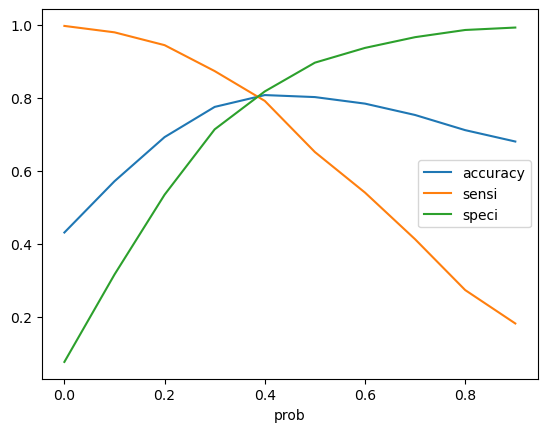

In [118]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As you can see that around 0.385, you get the optimal values of the three metrics. So let's choose 0.385 as our cutoff now.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.385 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.205152,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.099169,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.463802,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.778765,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.851008,1,1,1,1,1,1,1,1,1,1,0,1


In [120]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079042670445599

In [121]:
# Let's create the confusion matrix once again

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion2)

[[3502  403]
 [ 852 1594]]


In [123]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Calculate Sensitivity

TP/(TP+FN)

0.651676206050695

In [127]:
# Calculate the specificity

TN/(TN+FP)

0.8967989756722151

### Making Predictions on the Test Set

In [128]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [129]:
# Select the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Do Not Email_Yes,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0.070530,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1490,0.679695,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0.033243,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4216,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,0.073675,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[cols])

In [131]:
# Check X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Do Not Email_Yes,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,1.0,0.070530,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1490,1.0,0.679695,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4216,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.0,0.073675,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2879,1.0,0.264600,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6501,1.0,0.599730,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7155,1.0,0.231357,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
# Drop the required columns from X_test as well
X_test.drop(['Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Unsubscribed', 'What is your current occupation_Housewife'], 1, inplace = True)

In [133]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = lr4.predict(sm.add_constant(X_test))

In [134]:
y_test_pred[:10]

3271    0.115769
1490    0.912231
7936    0.086376
4216    0.707078
3830    0.122639
1800    0.403341
6507    0.335744
4821    0.306080
4223    0.768872
4714    0.463802
dtype: float64

In [135]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head
y_pred_1.head()

,0
3271,0.115769
1490,0.912231
7936,0.086376
4216,0.707078
3830,0.122639


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,0,0.115769
1,1,0.912231
2,0,0.086376
3,1,0.707078
4,0,0.122639


In [141]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.115769
1,1,0.912231
2,0,0.086376
3,1,0.707078
4,0,0.122639


In [143]:
# Make predictions on the test set using 0.385 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.385 else 0)

In [144]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.115769,0
1,1,0.912231,1
2,0,0.086376,0
3,1,0.707078,1
4,0,0.122639,0


In [145]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8071979434447301

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1397,  337],
       [ 188,  801]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Calculate sensitivity
TP / float(TP+FN)

0.8099089989888777

In [149]:
# Calculate specificity
TN / float(TN+FP)

0.8056516724336793

### Precision-Recall View

#### Let's now also build the training model using the precision-recall view

In [150]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3502,  403],
       [ 852, 1594]], dtype=int64)

Precision
TP / TP + FP

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7981972959439159

Recall
TP / TP + FN

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.651676206050695

#### Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

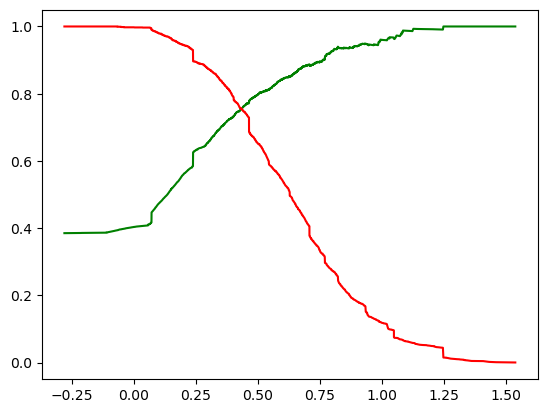

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.205152,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.099169,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.463802,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.778765,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.851008,1,1,1,1,1,1,1,1,1,1,0,1


In [158]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8104235553456148

In [159]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3297,  608],
       [ 596, 1850]], dtype=int64)

In [160]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Calculate Precision
#TP/(TP+FP)
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7526444263628966

In [162]:
# Calculate Recall
#TP/(TP+FN)
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7563368765331153

### Making Predictions on the Test Set

In [163]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = lr4.predict(sm.add_constant(X_test))

In [164]:
y_test_pred[:10]

3271    0.115769
1490    0.912231
7936    0.086376
4216    0.707078
3830    0.122639
1800    0.403341
6507    0.335744
4821    0.306080
4223    0.768872
4714    0.463802
dtype: float64

In [165]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Let's see the head

y_pred_1.head()

,0
3271,0.115769
1490,0.912231
7936,0.086376
4216,0.707078
3830,0.122639


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
3271,0,0.115769
1490,1,0.912231
7936,0,0.086376
4216,1,0.707078
3830,0,0.122639


In [170]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [171]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
3271,0,0.115769
1490,1,0.912231
7936,0,0.086376
4216,1,0.707078
3830,0,0.122639


In [172]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [173]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
3271,0,0.115769,0
1490,1,0.912231,1
7936,0,0.086376,0
4216,1,0.707078,1
3830,0,0.122639,0


In [174]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8031582813073815

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1453,  281],
       [ 255,  734]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Calculate Precision

#TP/(TP+FP)
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.723152709359606

In [178]:
# Calculate Recall

#TP/(TP+FN)
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7421638018200202

#### With cuttoff of 0.43, Precision is 72% and Recall is 74%

In [179]:
lr4.params.abs().sort_values(ascending=False)

Total Time Spent on Website                             0.788301
Lead Origin_Lead Add Form                               0.483202
Last Activity_Had a Phone Conversation                  0.405886
Last Notable Activity_Unreachable                       0.316851
What is your current occupation_Working Professional    0.311867
Lead Source_Welingak Website                            0.278319
Last Activity_SMS Sent                                  0.225500
const                                                   0.223876
Do Not Email_Yes                                        0.180839
Lead Source_Olark Chat                                  0.178131
Last Activity_Olark Chat Conversation                   0.167068
Specialization_Others                                   0.163705
Lead Origin_Landing Page Submission                     0.159315
dtype: float64

### Conclusion
The following variables matter the most to get the leads are:

Total Time Spent on Website                         
Lead Origin - Lead Add Form                    
Last Activity - Had a Phone Conversation       
Last Notable Activity - Unreachable       
What is your current occupation - Working Professional     
Lead Source - Welingak Website            
Last Activity - SMS Sent                                                     
Do Not Email - Yes                                
Lead Source - Olark Chat                       
Last Activity - Olark Chat Conversation       
Specialization - Others                             
Lead Origin - Landing Page Submission        

##### Accuracy of the model is around 80% with Precision - 72% and Recall - 74% with a cutoff of 43%